In [1]:
import fns
from fns.functionsTF import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTF loaded!
********************************************************************************
10 8 2


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
plt.style.use(['seaborn-paper'])
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})


In [7]:
N, g, tauv, i, nu = 1000, 5,15,0,100
T = 20000

gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=15,
                  device='/gpu:0',
                  spikeMonitor=True,
                  g0=g,
                  startPlast = 100,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
gpu.weight_step = 10
gpu.input = np.concatenate([np.zeros(T//2),np.ones(T//2)*150])
gpu.dt = 0.1
gpu.FACT = 500
gpu.nuI = 100
gpu.nuE = gpu.nuI 
gpu.ratio = 2
gpu.ratioNI = 0.2
gpu.wII = -1000
gpu.wIE = -3000
gpu.wEE = 1000
gpu.wEI = 1000
gpu.IAF = True
gpu.runTFSimul()

    

1000 800 200


1: 100%|██████████| 20000/20000 [00:31<00:00, 644.86it/s]

31.08


In [8]:
def f(w=20,h=3):
    plt.figure(figsize=(w,h), linewidth=0.1)

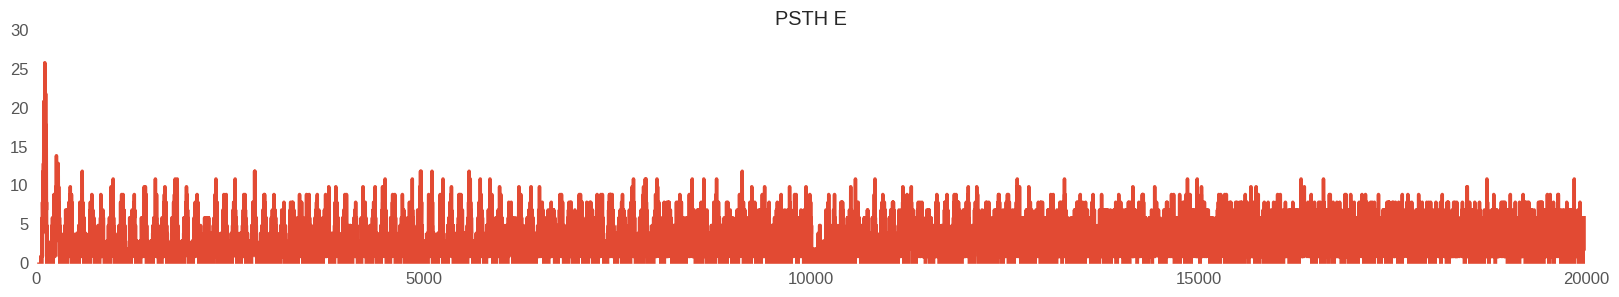

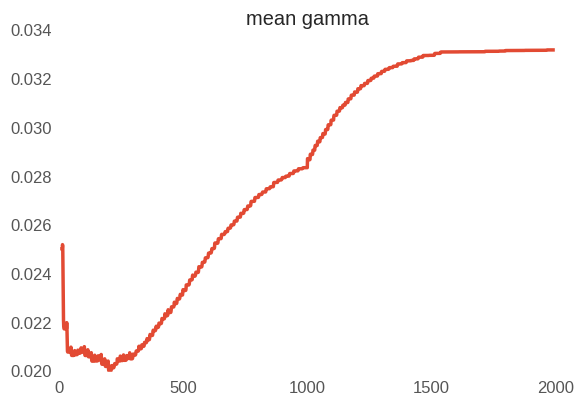

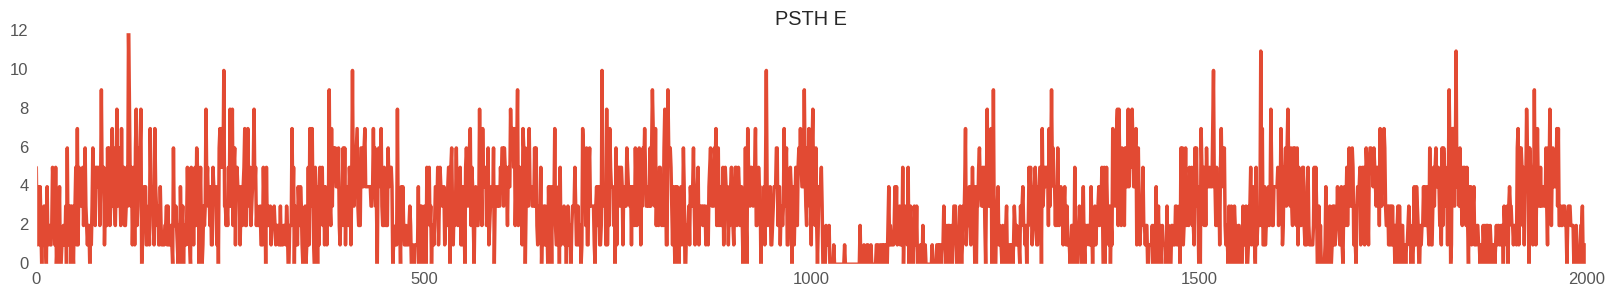

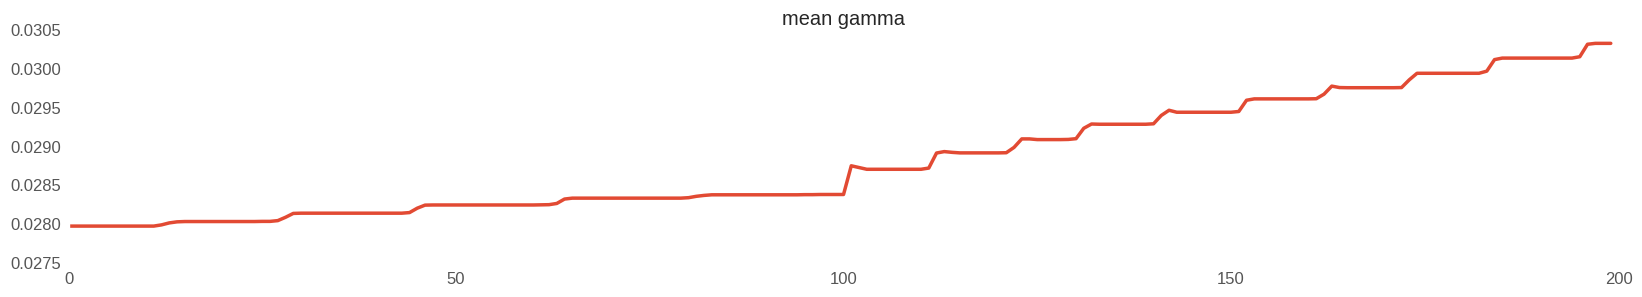

In [9]:
f()
plt.plot(gpu.vvmE[10:])
plt.title('PSTH E')
plt.figure()
plt.plot(gpu.gamma)
plt.title('mean gamma')
# plt.figure()
# plt.plot(gpu.input)
# plt.title('Input current')

t0 = T//2 - 1000
t1 = T//2 + 1000

f()
plt.plot(gpu.vvmE[t0:t1])
plt.title('PSTH E')

f()
plt.plot(gpu.gamma[t0//gpu.weight_step:t1//gpu.weight_step])
plt.title('mean gamma')
# plt.figure()
# plt.plot(np.mean(np.array(gpu.lowsp).reshape(T,N).transpose(), axis=0))